In [51]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import sys, os
root = os.path.join(os.getcwd(), '../')
sys.path.append(root)

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Distgen Check

<disgten.Generator with input: 
n_particle: 20000
output:
  file: gpt.particles.gdf
  type: gpt
r_dist:
  alpha:
    units: dimensionless
    value: 0
  sigma_xy:
    units: um
    value: 100
  type: rsg
random_type: hammersley
start:
  MTE:
    units: meV
    value: 5
  type: cathode
t_dist:
  alpha:
    units: dimensionless
    value: 0.0
  sigma_t:
    units: fs
    value: 25
  type: sg
total_charge:
  units: fC
  value: 16

>


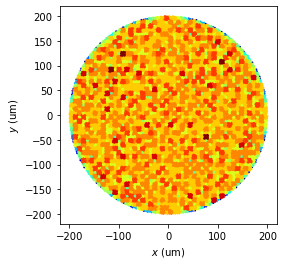

In [2]:
from distgen.generator import Generator
from distgen.plot import plot_2d, plot_1d, plot_current_profile

DISTGEN_INPUT_FILE = os.path.join(root,'templates/cold_ncrf_gun/distgen.in.yaml')
gen = Generator(DISTGEN_INPUT_FILE)
print(gen)
beam = gen.beam()

units = {"x":"um","y":"um","px":"eV/c","py":"eV/c","t":"fs","q":"pC"}
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=50,axis="equal");

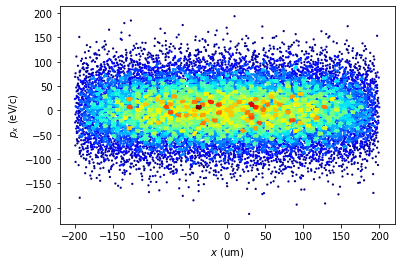

In [3]:
plot_2d(beam,1,"x",units["x"],"px",units["px"],'scatter_hist2d',nbins=75);

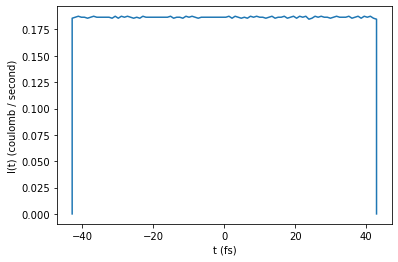

In [4]:
plot_current_profile(beam,1,units)

# Run GPT with Distgen

Its often useful to run the GPT input file without setting anything, just to make sure there are no syntax errors in the file.  

In [11]:
from gpt.gpt_distgen import run_gpt_with_distgen

In [157]:
GPT_INPUT_FILE = os.path.join(root,'templates/cold_ncrf_gun/gpt.in')
DISTGEN_INPUT_FILE = os.path.join(root,'templates/cold_ncrf_gun/distgen.in.yaml')

settings={'n_particle':200, 
          'PC1':10000000,
          'PC2':1000000}

G = run_gpt_with_distgen(settings,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         verbose=False)
print(G)

GPT object:
   Original input file: gpt.in
   Template location: /Users/colwyngulliford/Documents/GitHub/lume-gpt/templates/cold_ncrf_gun
   Use temp directory: True

Run Control
   Run configured: True
   Work location: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmp0y99rwhm
   Timeout: 2500 (sec)

Results
   Finished: True
   Error occured: False
   Run time: 0.12709403038024902 (sec)


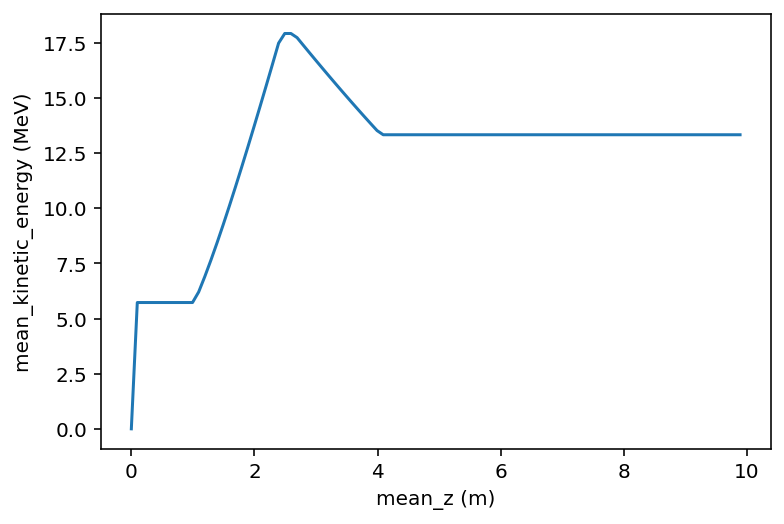

In [158]:
key1 = 'mean_z'
key2 = 'mean_kinetic_energy'
dat1 = G.stat(key1)
dat2 = G.stat(key2)/1e6
units1 = G.stat_units(key1)
units2 = G.stat_units(key2)

fig, ax = plt.subplots()
ax.plot(dat1, dat2)
ax.set_xlabel(key1+f' ({units1})');
ax.set_ylabel(key2+f' (MeV)');

# Run GPT with Distgen and energy gain cavity auto phasing



In [173]:
settings = {'PC1':10000,
            'PC2':10000}

G = run_gpt_with_distgen(settings,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         auto_phase=True,
                         workdir='tmp/',
                         use_tempdir=False,
                         verbose=True)

run_gpt_with_distgen
/Users/colwyngulliford/Documents/GitHub/lume-gpt/examples
PC1 is in gpt
PC2 is in gpt


AttributeError: module 'os' has no attribute 'join'